<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/PPGOLD_logo.png" width="300" alt="PPGOLD Data Science: INTRO"  />
</p>

# Aula 08-2 de Data Science

# K-Means (Clusterização não Hierárquica)
* Tempo estimado: **60** minutos

## Objetivos

Após completar essa aula você será capaz de :

*   Criar Clusters não hierárquicos com o algorítimo K-Means.
*   Fazer previsão de uma nova observação.
*   Realizar análises da qualidade da clusterização.    

## Bibliotecas

In [24]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from scipy.stats import f_oneway

%matplotlib inline

## Obtendo Dados

In [25]:
estudante = ['Gabriela','Luiz Felipe','Patrícia','Ovídio','Leonor']
notas_matematica = np.array([3.7,7.8,8.9,7.0,3.4])
notas_fisica = np.array([2.7,8.0,1.0,1.0,2.0])
notas_quimica = np.array([9.1,1.5,2.7,9.0,5.0])
df_notas = pd.DataFrame({'matematica':notas_matematica,'fisica':notas_fisica,'quimica':notas_quimica},index=estudante)
df_notas.head()

,matematica,fisica,quimica
Gabriela,3.7,2.7,9.1
Luiz Felipe,7.8,8.0,1.5
Patrícia,8.9,1.0,2.7
Ovídio,7.0,1.0,9.0
Leonor,3.4,2.0,5.0


## K-Means

Nós Usaremos 3 parâmetros para o KMeans:

* init: k-means++ - Seleção automática nos centróides iniciais
* n_clusters: 3 Número de CLusters
* n_init: 30 quantas reinicializações com diferentes centróides

In [26]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 30)

In [27]:
k_means.fit(df_notas)

KMeans(n_clusters=3, n_init=30)

In [28]:
numero_clusters = k_means.n_clusters
numero_clusters

3

In [29]:
k_means_labels = k_means.labels_
k_means_labels

array([1, 2, 0, 1, 1])

In [30]:
k_means_centroids = k_means.cluster_centers_
k_means_centroids

array([[8.9, 1. , 2.7],
       [4.7, 1.9, 7.7],
       [7.8, 8. , 1.5]])

In [31]:
k_means_centroids[:,0]

array([8.9, 4.7, 7.8])

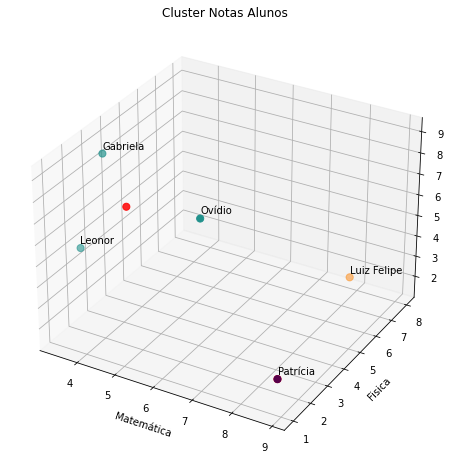

In [32]:
# Gerar gráfico 3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_notas.iloc[:, 0], df_notas.iloc[:, 1], df_notas.iloc[:, 2], c=k_means_labels, s=50)
ax.set_title('Cluster Notas Alunos')
ax.set_xlabel('Matemática')
ax.set_ylabel('Fisica')
ax.set_zlabel('Quimica')

# Adicionar o nome dos alunos como texto ao lado de cada ponto
for i in range(len(k_means_labels)):
    row = df_notas.iloc[i]
    ax.text(row['matematica'], row['fisica'], row['quimica']+0.2, row.name)


ax.scatter(k_means_centroids[:,0], k_means_centroids[:,1], k_means_centroids[:,2],color='red', s=50)

## Prevendo o Cluster do Henrique

In [33]:
df_notas_henrique = pd.DataFrame({'matematica':[8.0],'fisica':[2.0],'quimica':[3]},index=['Henrique'])
df_notas_henrique.head()

,matematica,fisica,quimica
Henrique,8.0,2.0,3


In [34]:
# Prever os clusters de um conjunto de dados inteiro
predicted_clusters = k_means.predict(df_notas_henrique)

# Imprimir as etiquetas dos clusters para cada ponto de dados
print("Etiquetas dos clusters: ", predicted_clusters)


Etiquetas dos clusters:  [0]


Text(8.0, 2.0, 'Henrique')

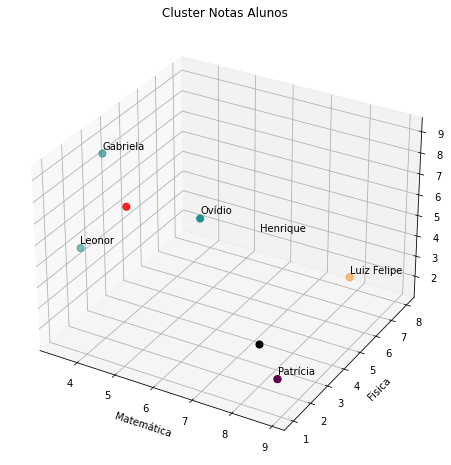

In [35]:
# Gerar gráfico 3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_notas.iloc[:, 0], df_notas.iloc[:, 1], df_notas.iloc[:, 2], c=k_means_labels, s=50)
ax.set_title('Cluster Notas Alunos')
ax.set_xlabel('Matemática')
ax.set_ylabel('Fisica')
ax.set_zlabel('Quimica')

# Adicionar o nome dos alunos como texto ao lado de cada ponto
for i in range(len(k_means_labels)):
    row = df_notas.iloc[i]
    ax.text(row['matematica'], row['fisica'], row['quimica']+0.2, row.name)


ax.scatter(k_means_centroids[:,0], k_means_centroids[:,1], k_means_centroids[:,2],color='red', s=50)

ax.scatter(df_notas_henrique.iloc[:, 0], df_notas_henrique.iloc[:, 1], df_notas_henrique.iloc[:, 2],color='black', s=50)

ax.text(df_notas_henrique.iloc[0, 0], df_notas_henrique.iloc[0, 1], df_notas_henrique.iloc[0, 0]+0.2, 'Henrique')

In [36]:
# Calcular o coeficiente de Silhouette
silhouette_coef = silhouette_score(df_notas, k_means_labels)
print("Coeficiente de Silhouette:", silhouette_coef)

Coeficiente de Silhouette: 0.20721453313164395


## Análise de silhueta

In [37]:
silhouette_scores = []

for n_clusters in range(2, 5):
    # Criando o modelo de clustering hierárquico
    k_means = KMeans(init = "k-means++", n_clusters = n_clusters, n_init = 5)
    # Ajustando o modelo aos dados
    k_means.fit(df_notas)
    # Calculando o valor de silhueta para o modelo
    silhouette_avg = silhouette_score(df_notas, k_means_labels)
    # Adicionando o valor de silhueta à lista
    silhouette_scores.append(silhouette_avg)

# Imprimindo os valores de silhueta para cada número de clusters testado
for i, score in enumerate(silhouette_scores):
    print(f"Silhouette score para {i+2} clusters: {score:.2f}")

Silhouette score para 2 clusters: 0.21
Silhouette score para 3 clusters: 0.21
Silhouette score para 4 clusters: 0.21


# Análise Elbow

Text(0, 0.5, 'Inertia')

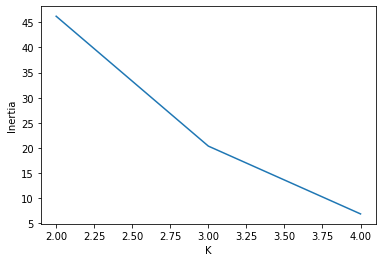

In [40]:
inertias = []
sizes = range(2, 5)

for k in sizes:
    k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 5)
    k_means.fit(df_notas)
    inertias.append(k_means.inertia_)

fig, ax = plt.subplots(figsize=(6, 4))
pd.Series(inertias, index=sizes).plot(ax=ax)
ax.set_xlabel("K")
ax.set_ylabel("Inertia")

## Análise dos clusters

In [15]:
df_notas['cluster'] = k_means_labels
df_notas_henrique['cluster'] = predicted_clusters
df_notas_henrique
df_notas = pd.concat([df_notas,df_notas_henrique],axis='rows')
df_notas.head(10)

,matematica,fisica,quimica,cluster
Gabriela,3.7,2.7,9.1,0
Luiz Felipe,7.8,8.0,1.5,1
Patrícia,8.9,1.0,2.7,2
Ovídio,7.0,1.0,9.0,0
Leonor,3.4,2.0,5.0,0
Henrique,8.0,2.0,3.0,2


In [16]:
df_media_cluster = df_notas.groupby('cluster')[['matematica','fisica','quimica']].mean()
df_media_cluster.head(10)

,matematica,fisica,quimica
cluster,,,
0,4.70,1.9,7.70
1,7.80,8.0,1.50
2,8.45,1.5,2.85


In [17]:
df_desvio_cluster = df_notas.groupby('cluster')[['matematica','fisica','quimica']].std(ddof=1)
df_desvio_cluster.head(10)

,matematica,fisica,quimica
cluster,,,
0,1.997498,0.854400,2.338803
1,NaN,NaN,NaN
2,0.636396,0.707107,0.212132


In [18]:
df_frequencia_cluster = df_notas.groupby('cluster')[['matematica','fisica','quimica']].count()
df_frequencia_cluster.head(10)

,matematica,fisica,quimica
cluster,,,
0,3,3,3
1,1,1,1
2,2,2,2


### Análise de variância

#### Revisando

* *O teste F é importante para a análise de variância entre grupos porque permite verificar se há diferenças significativas nas médias de mais de dois grupos.*
* *Ele compara a variabilidade entre os grupos com a variabilidade dentro dos grupos, e se a diferença entre as médias entre os grupos for maior do que a variabilidade dentro dos grupos, o resultado do teste F será maior e a hipótese nula de igualdade das médias será rejeitada.*

* *Podemos pensar no teste F como uma forma de comparar a variação dos dados entre diferentes grupos com a variação dos dados dentro de cada grupo individualmente. É como se comparássemos a diferença entre as alturas de jogadores de basquete e jogadores de futebol com a variação das alturas dos jogadores dentro de cada grupo separadamente. Se a diferença entre as alturas médias dos jogadores de basquete e futebol for maior do que a variação das alturas dentro de cada grupo, podemos concluir que as alturas médias são estatisticamente diferentes entre os grupos.*

**Teste F**
$$F = \frac{MS_{between}}{MS_{within}}$$

Onde:

* $F$ é o valor do teste F
* $MS_{between}$ é a média dos quadrados dos desvios entre grupos, também conhecida como variância entre grupos.
* $MS_{within}$ é a média dos quadrados dos desvios dentro dos grupos, também conhecida como variância dentro dos grupos.

**Variância Entre Grupos**

$$MS_{between} = \frac{SS_{between}}{df_{between}}$$ 

Onde:
* $MS_{between}$ é a média dos quadrados dos desvios entre grupos
* $SS_{between}$ é a soma dos quadrados entre grupos, que representa a variação total entre os grupos, calculada subtraindo-se a média geral das obervações de cada grupo elevando o resultado ao quadrado e multiplicando pelo número de obervações em cada grupo.
* $df_{between}$ é o número de graus de liberdade entre os grupos, calculado como o número de grupos menos 1.

**Variância Dentro dos Grupos**

$$MS_{within} = \frac{SS_{within}}{df_{within}}$$

Onde:
* $SS_{within}$ é a soma dos quadrados dentro dos grupos, que representa a variação dentro de cada grupo, calculada somando-se as diferenças entre cada observação e a média do seu grupo ao quadrado.

* $df_{within}$ é o número de graus de liberdade dentro dos grupos, calculado como o número total de observações menos o número de grupos.


**Soma dos Quadrados Entre Grupos**

$$SS_{between} = \sum\limits_{i=1}^{k} n_i (\bar{x}_i - \bar{x})^2$$

Onde:
* $SS_{between}$ é a soma dos quadrados entre os grupos, que representa a variação total entre os grupos, calculada subtraindo-se a média geral das observações de cada grupo e elevando o resultado ao quadrado e multiplicando pelo número de observações em cada grupo.
* $k$ é o número de grupos
* $n_i$ é o número de observações no grupo $i$
* $\bar{x}_i$ é a média do grupo $i$
* $\bar{x}$ é a média geral das observações.

**Soma dos Quadrados Dentro dos Grupos**

$$SS_{within} = \sum\limits_{i=1}^{K}\sum\limits_{j=1}^{n_i} (x_{ij} - \bar{x}_i)^2$$

Onde:

* $SS_{within}$ é a soma dos quadrados dentro dos grupos, que representa a variação dentro de cada grupo, calculada somando-se as diferenças entre cada observação e a média do seu grupo ao quadrado.
* $x_{ij}$ é a observação $j$ do grupo $i$.
* $\bar{x}_i$ é a média do grupo $i$.


**Graus de Liberdade Entre os Grupos**

$$df_{between} = k-1$$

Onde:
* $df_{between}$ é o número de graus de liberdade entre os grupos, calculado como o número de grupos menos 1.
* $k$ é o número de grupos

**Graus de Liberdade Dentro dos Grupos**

$$df_{within} = N-k$$

Onde:
* $df_{within}$ é o número de graus de liberdade dentro dos grupos, calculado como o número total de observações menos o número de grupos.
* $N$ é o número total de observações.

#### Implementando

In [23]:
df_notas = df_notas[df_notas.index != 'Henrique']
materias = ['matematica', 'fisica','quimica']

# Obter os grupos (clusters) separados
groups = [df_notas.loc[df_notas['cluster'] == i, materias] for i in range(numero_clusters)]

# Obter os tamanhos dos grupos e o número total de observações
group_sizes = [len(group) for group in groups]
n = sum(group_sizes)
print('n=',n)
# separar os dados da matematica por cluster
n_cluster = df_notas['cluster'].max() + 1

for materia in materias:

    grupos = []   
    print('Anova para aula de ',materia)
    
    for i in range(n_cluster):
        grupos.append(df_notas.loc[df_notas['cluster'] == i, materia])

    # análise de variância para a materia
    f_stat, p_val = f_oneway(*grupos)
    print('F-statistic:', f_stat)
    print('p-value:', p_val)

    # cálculo dos graus de liberdade
    df_between = numero_clusters-1
    print('DF Between:', df_between)

    soma_within = 0
    for i in range(n_cluster):
        soma_within+= len(grupos[i])

    df_within = soma_within-n_cluster
    print('DF Within:', df_within)

    # cálculo do Total SS
    total_ss = ((df_notas[materia] ** 2).sum() - df_notas[materia].sum() ** 2 / n).sum()
    print('Total SS:', total_ss)

    # cálculo do Group SS
    group_means = [cluster.mean() for cluster in grupos]
    group_ss = sum([len(cluster) * ((cluster_mean - df_notas[materia].mean()) ** 2).sum() for cluster, cluster_mean in zip(grupos, group_means)])
    print('Between Group SS:', group_ss)

    # cálculo do Within SS
    error_ss = total_ss - group_ss
    print('Within SS:', error_ss)

    # cálculo do Mean Square Between
    ms_between = group_ss / df_between
    print('MS Between:', ms_between)

    # cálculo do Mean Square Within
    ms_within = error_ss / df_within
    print('MS Within:', ms_within)

    print(' ')

n= 5
Anova para aula de  matematica
F-statistic: 2.0791979949874673
p-value: 0.3247598893049
DF Between: 2
DF Within: 2
Total SS: 24.57200000000003
Between Group SS: 16.592000000000002
Within SS: 7.980000000000029
MS Between: 8.296000000000001
MS Within: 3.9900000000000144
 
Anova para aula de  fisica
F-statistic: 22.33698630136985
p-value: 0.042850434374266284
DF Between: 2
DF Within: 2
Total SS: 34.07200000000001
Between Group SS: 32.612
Within SS: 1.460000000000008
MS Between: 16.306
MS Within: 0.730000000000004
 
Anova para aula de  quimica
F-statistic: 3.505667276051189
p-value: 0.2219427087559847
DF Between: 2
DF Within: 2
Total SS: 49.29199999999997
Between Group SS: 38.352
Within SS: 10.939999999999976
MS Between: 19.176
MS Within: 5.469999999999988
 


## Referências

[1] Capítulo 09 do livro: FÁVERO, Luiz Paulo; BELFIORE, Patrícia. `Manual de análise de dados: estatística e modelagem multivariada com Excel®, SPSS® e Stata®`. Elsevier Brasil, 2017.

[2] https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

[3] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

[4] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

[5] Matt Harrison - Machine Learning Pocket Reference_ Working with Structured Data in Python-O'Reilly Media (2019)

## Autores

<a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pecora</a>

<a href="https://www.linkedin.com/in/hesauhugocavalcanti/" target="_blank">Hesau Hugo</a>

## Log de modificações

| Data | Versão | Modificado por | Descrição |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 17-04-2023       | 1.0     | Hesau Hugo        | Inicial        |